# Exploratory Data Analysis
### Information: Dataset of health and behavioral measurements related to coronary heart disease (CHD)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tools import *
from math import ceil

## Structure of the dataset

In [45]:
pd.set_option("display.max_columns", None);
pd.set_option('display.max_rows', 50);
data = pd.read_csv("Dataset2.txt", sep=";", index_col="ind");

In [46]:
data.head(30)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


**Description of features**
- sbp: Systolic blood pressure (pressure in arteries during heartbeats)
- tobacco: Daily tobacco consumption (in grams)
- ldl: LDL cholesterol level ("bad" cholesterol)
- adiposity: Body fat measurement based on height and weight
-famhist: Family history of heart disease ("Present" or "Absent")
- typea: Type A behavior pattern (competitive, impatient)
- obesity: Obesity measurement based on height and weight
- alcohol: Daily alcohol consumption (in grams)
- age: Age of the individual (in years)
- chd: Coronary heart disease (1 = CHD present, 0 = absent)

In [47]:
print('Dimensions: ', data.shape)

Dimensions:  (462, 10)


Principle: link between different body/health information and the presence of heart disease (chd)

In [48]:
data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

Let's split the features into 2 lists for easier plotting :
- **Numerical** (`num_col`) : continuous features or discrete features with many unique values 
- **Categorical** (`cat_col`) : nominal features, ordinal features or discrete features with few unique values 

In [49]:
nominal_col = list(data.select_dtypes('O').columns)
non_nominal_col = list(data.select_dtypes(np.number).columns)

# Ordinal or discrete with few unique values
low_cardinality_num = ['chd']

num_col = [x for x in non_nominal_col if x not in low_cardinality_num]
cat_col = nominal_col + low_cardinality_num

print('Numerical columns:',num_col)
print('Categorical columns:')
for i in cat_col:
    print(i,data[i].unique(),sep=':\n',end='\n\n')

Numerical columns: ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
Categorical columns:
famhist:
['Present' 'Absent']

chd:
[1 0]



In [50]:
cat_col = list(data.select_dtypes('O').columns)
num_col = list(data.select_dtypes(np.number).columns)
num_col = [x for x in num_col if x != 'chd']
cat_col += ['chd']
for i in cat_col:
    print(i,data[i].unique(),sep=':\n',end='\n\n')

famhist:
['Present' 'Absent']

chd:
[1 0]



## Checking missing values

In [51]:
data.isna().any()

sbp          False
tobacco      False
ldl          False
adiposity    False
famhist      False
typea        False
obesity      False
alcohol      False
age          False
chd          False
dtype: bool

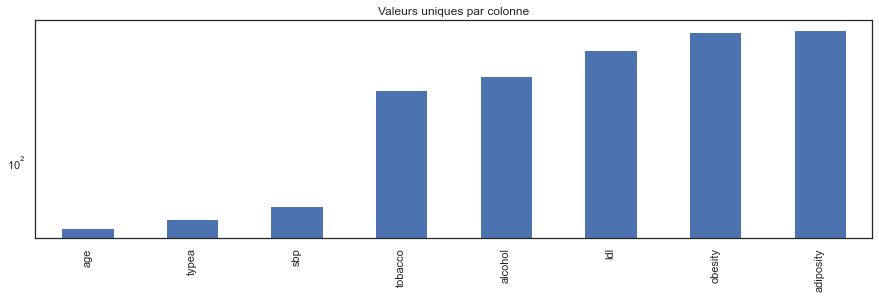

In [52]:
get_unique_values(data[num_col])

## Stats / Visualization

In [53]:
data.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


- Wind speed is the column that varies most from its average, so it's certainly interesting.
Temperature varies very little in comparison, but is still interesting because it can vary greatly from day to day or season to season.
- The number of electrons doesn't really seem to vary with height; the very slight variations in average can perhaps be explained by the small scale of the dataset.
- There's a big difference between the average wind speed between 9 and 12 meters, then a slight one between 12 and 15 meters.
- The speed at 9 meters may therefore not be very useful, especially as the wind is more likely to encounter obstacles at lower heights and therefore attenuate, which is not ideal.

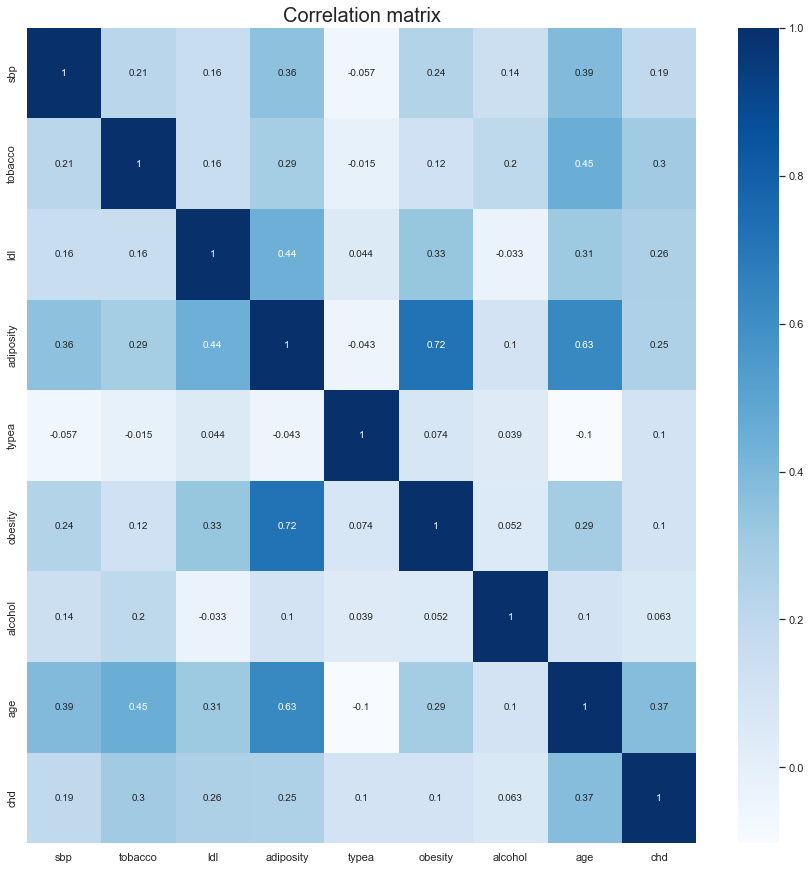

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
plt.title("Correlation matrix", fontsize=20)
sns.heatmap(data=data[non_nominal_col].corr(),cmap='Blues',annot=True, ax=ax)
plt.show()

- Notable correlations: adiposity/obesity and adiposity/age (to be seen later).
- Overall, age is correlated with many other variables. But it does provide additional information, so it's certainly worth keeping in mind that age simply influences the body.

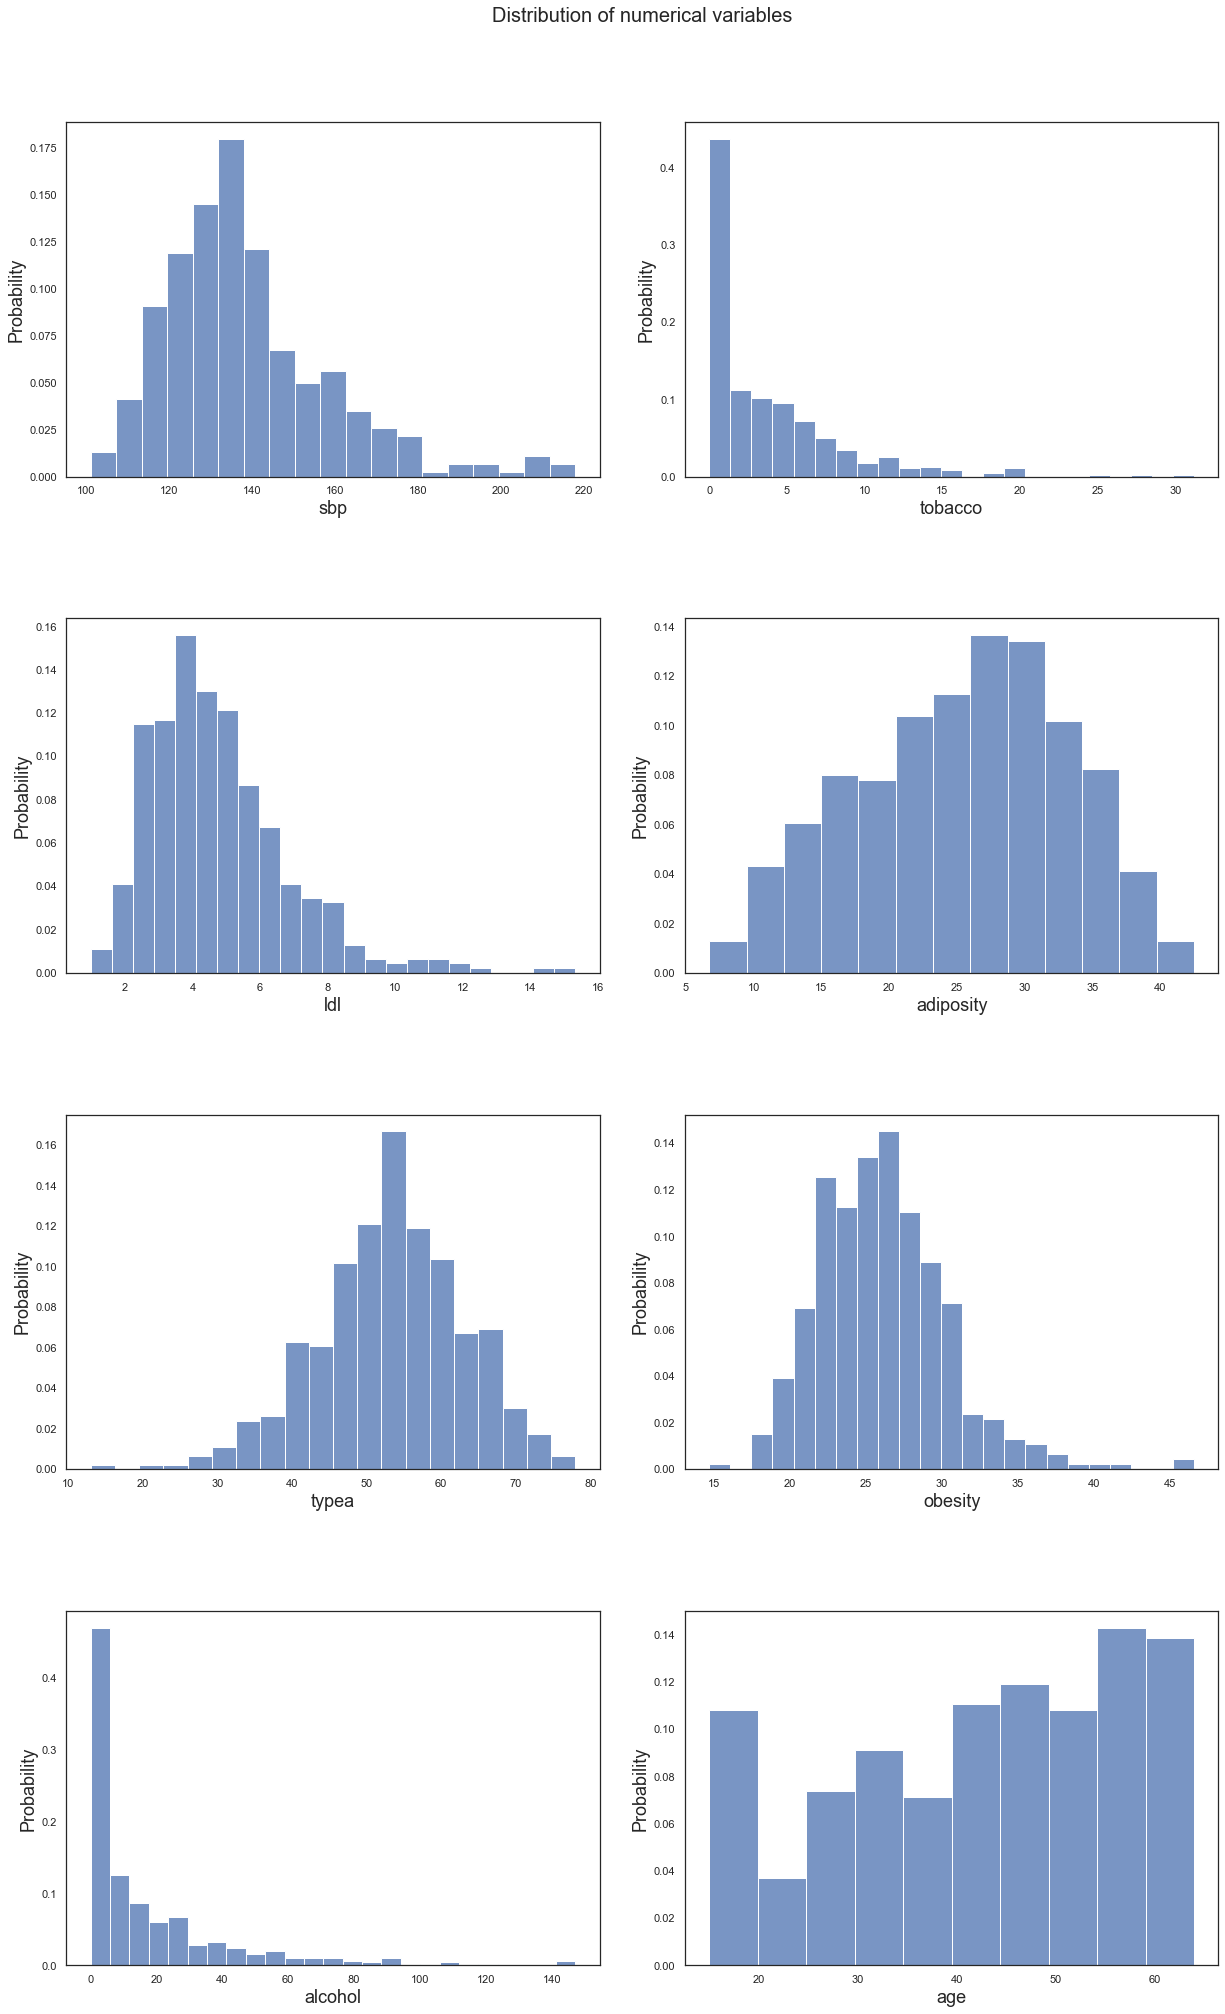

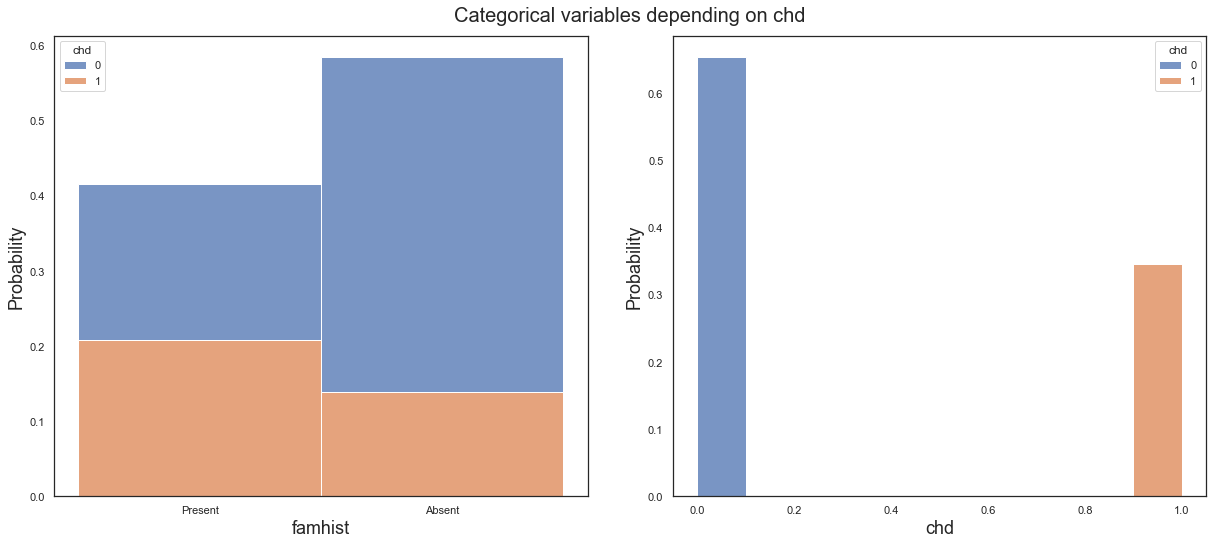

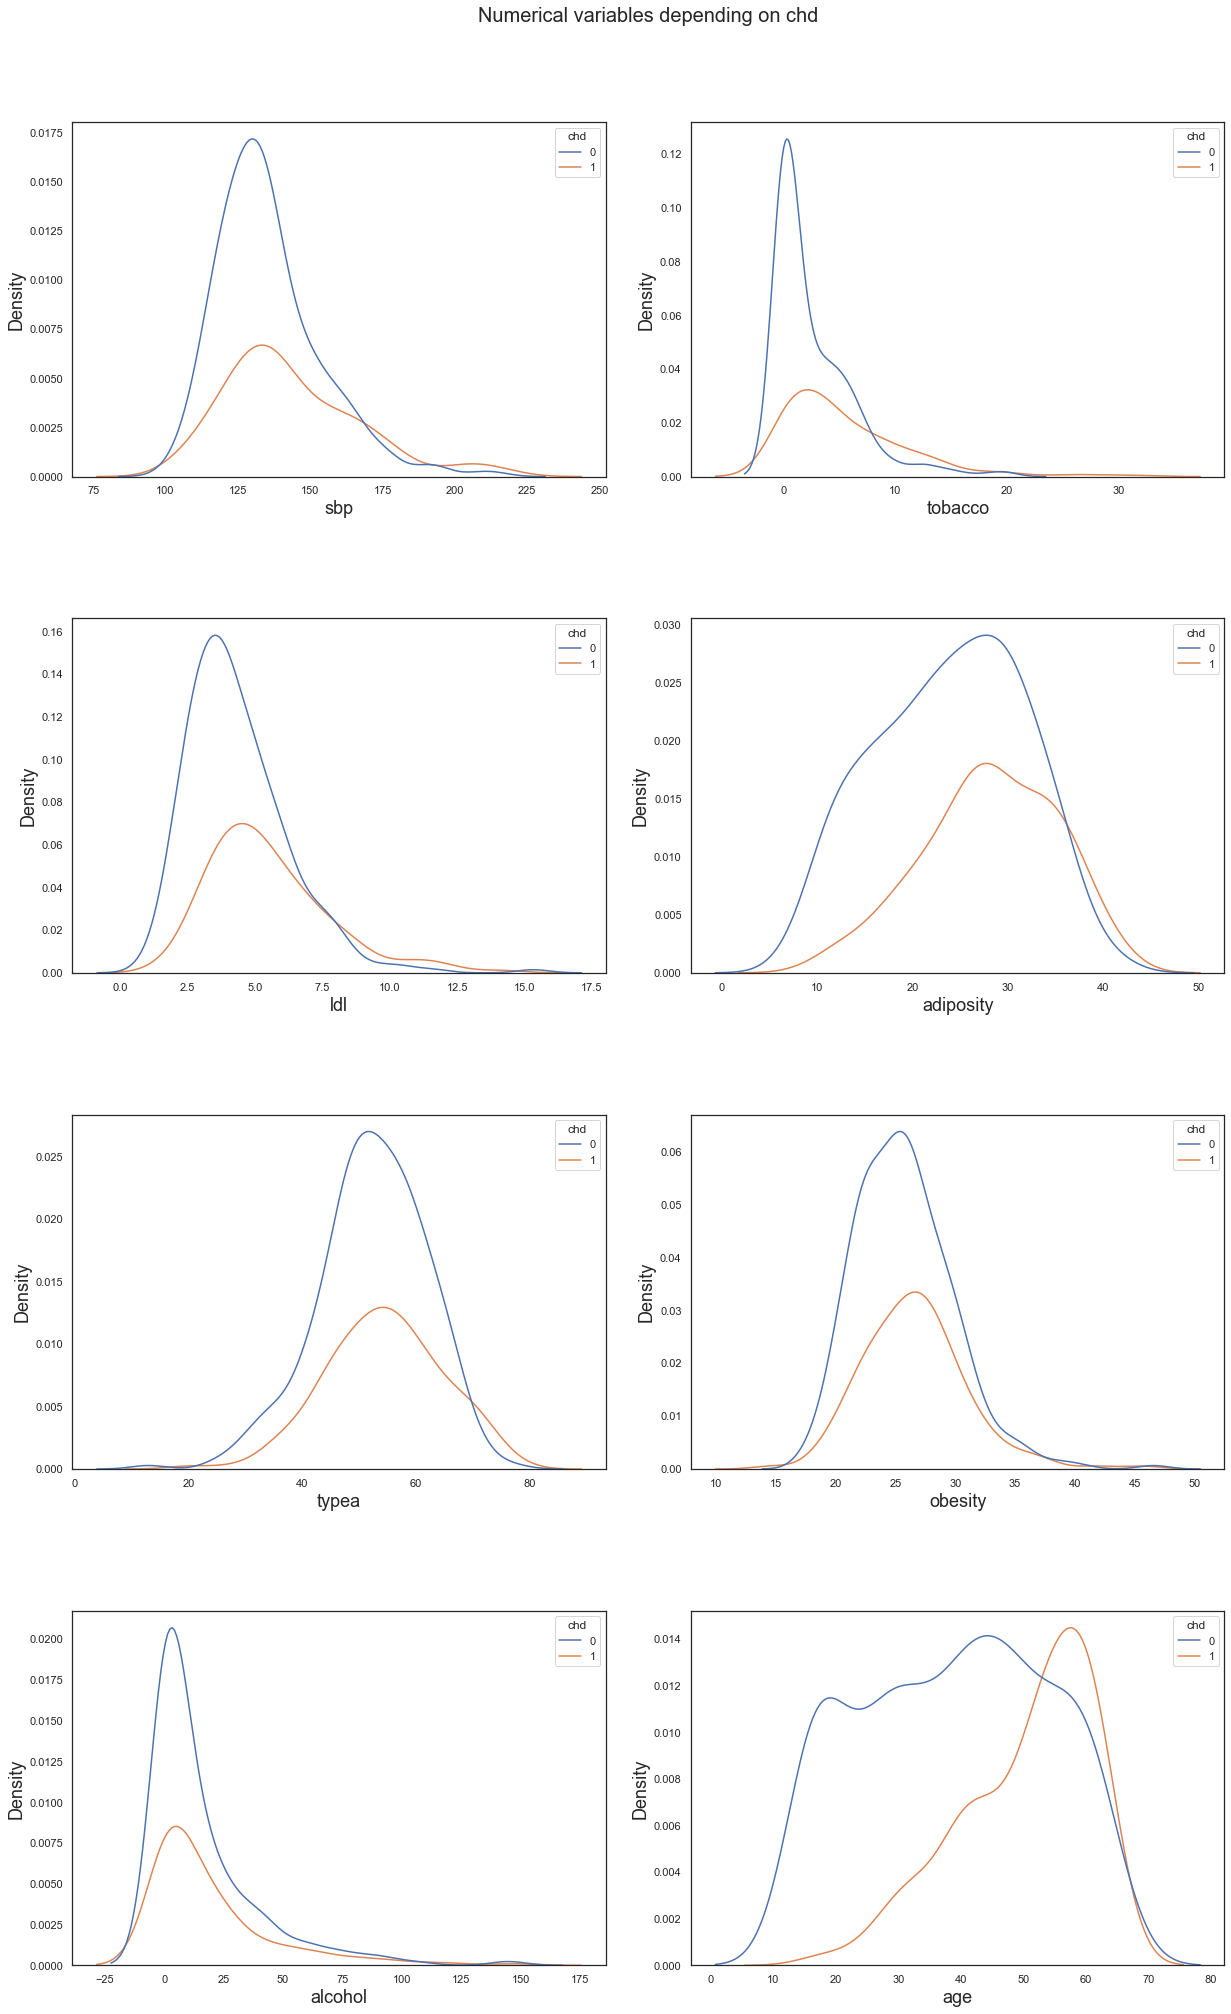

In [55]:
fig1 = distribution(data, num_col)
fig1.suptitle("Distribution of numerical variables", fontsize=20, y=0.95)
fig2 = cat_plot(data, cat_col, "chd", "classification")
fig2.suptitle("Categorical variables depending on chd", fontsize=20, y=0.95)
fig3 = num_plot(data, num_col, "chd", "classification")
fig3.suptitle("Numerical variables depending on chd", fontsize=20, y=0.95)
plt.show()

- The linear correlation between chd and the other variables is fairly low, but we can see that they are still very closely linked to chd. The relationship is just not linear, given that chd is a nominal variable.
- The higher the value of each variable, the higher the risk of heart disease (consistent with their meaning: obesity, smoking, alcohol consumption, etc.).
- For most factors, the density curve representing the presence of disease rises later than that representing the absence.
- Then, after reaching its peak, the density of the absence of disease decreases very rapidly, while the density of the presence of disease decreases slowly. This is normal, as high values are rarer, hence the decrease in density, but are more likely to cause heart disease.
- As far as age is concerned, around the age of 60 there are far more individuals with heart disease than without.
- The presence of a family history has a huge influence on risk, which is consistent.
Obesity, on the other hand, is highly correlated with adiposity, which is normal since adiposity represents the accumulation of fat in tissues.

qDistributions:
- very asymmetrical on the right: alcohol, tobacco (log/normalization?)
- slightly asymmetrical on the right: ldl, sbp, obesity (log/normalization?)
- very slightly skewed left: adiposity, age, typea (normalization?) Distributions:
- very asymmetrical on the right: alcohol, tobacco (log/normalization?)
- slightly asymmetrical right: ldl, sbp, obesity (log/normalization?)
- very slightly skewed left: adiposity, age, typea (normalization?)

Let's check their link

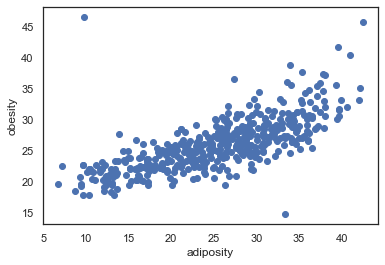

In [56]:
plt.scatter(data.adiposity, data.obesity)
plt.xlabel('adiposity')
plt.ylabel('obesity')
plt.show()

- The 2 variables are very closely linked. We could do without one of them, perhaps obesity, as adiposity provides a little more information (information on fat + muscle).
- On the other hand, we notice that some points have very high obesity and very low adiposity, or vice versa.
This seems abnormal and should be removed.

In [57]:
data[(((data.adiposity > 32) & (data.obesity < 17)) | (((data.obesity > 45) & (data.adiposity < 15))))].head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
45,114,0.0,2.99,9.74,Absent,54,46.58,0.0,17,0
463,132,0.0,4.82,33.41,Present,62,14.70,0.0,46,1


- It's unlikely that the one with high obesity and low adiposity would, at just 17, be a bodybuilder with lots of muscle and little fat, especially with such a low type A (competitive spirit). The values of the other sample are a little more plausible.
- We can remove either just the first or both.

In [58]:
print(data.shape[0])
data = data[~(((data.adiposity > 32) & (data.obesity < 17)) | (((data.obesity > 45) & (data.adiposity < 15))))]
print(data.shape[0])

462
460


One or more outliers can be seen in the distribution of typea

In [59]:
data[data.typea < 30].head(100)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
118,154,0.70,5.91,25.00,Absent,13,20.60,0.00,42,0
219,114,0.00,4.97,9.69,Absent,26,22.60,0.00,25,0
335,152,19.45,4.22,29.81,Absent,28,23.95,0.00,59,1
338,130,7.28,3.56,23.29,Present,20,26.80,51.87,58,1
351,162,5.60,4.24,22.53,Absent,29,22.91,5.66,60,0
377,126,0.00,5.29,27.64,Absent,25,27.62,2.06,45,0


There is one individual with a much weaker type A than all the others (13). Seems pretty normal apart from that, but with high blood pressure, which is odd because it's often caused by stress.

Let's look at the outliers in the distribution of alcohol consumption

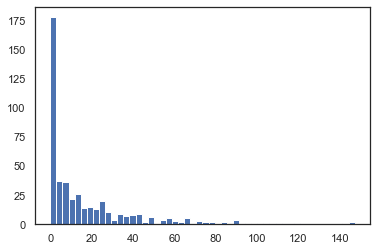

In [60]:
plt.hist(data.alcohol, bins=50)
plt.show()

In [61]:
data[data.alcohol >110].head(100)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
155,124,3.04,4.80,19.52,Present,60,21.78,147.19,41,1
156,138,8.80,3.12,22.41,Present,63,23.33,120.03,55,1
373,132,6.00,5.97,25.73,Present,66,24.18,145.29,41,0
376,140,0.00,2.40,27.89,Present,70,30.74,144.00,29,0


There are very few people consuming more than 110g of alcohol per day, so they could be considered outliers.
We could remove them, but there are still 3 individuals with a similar quantity of alcohol, so it's better to keep them; it's simply that there are few individuals who consume that much alcohol.

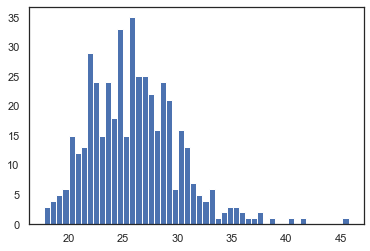

In [62]:
plt.hist(data.obesity, bins=50)
plt.show()

There's an outlier in the distribution of obesity, but it's not an aberration, so we might as well keep it for now.

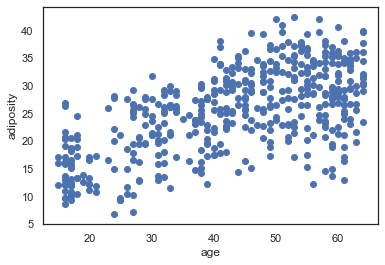

In [63]:
plt.scatter(data.age, data.adiposity)
plt.xlabel('age')
plt.ylabel('adiposity')
plt.show()

- The positive correlation between age and adiposity is visible: as age increases, so does adiposity, because it's harder to build muscle and physical activity is more limited --> more fat.
- There are no cases of high adiposity in young people, because muscles develop easily.

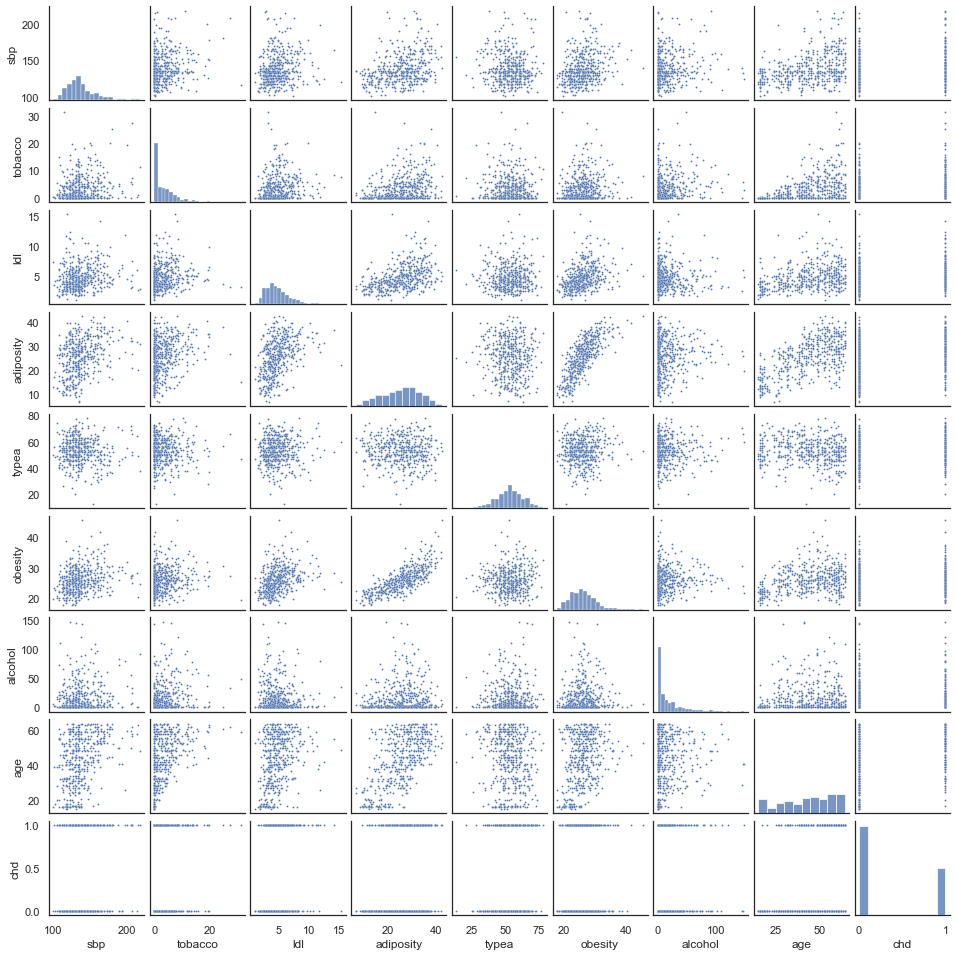

In [64]:
#In case there are relationships or outliers I haven't noticed
sns.pairplot(data, height=1.5, plot_kws={"s": 3.5, "alpha": 1})
plt.show()

- No one with high obesity and high alcohol consumption (probably incompatible).
- Nor is there anyone with both high alcohol and drug consumption (probably impossible to maintain).
- Nobody with low type A and high obesity either, and more generally people with low type A never have high values in the other risk factors; this is counter-intuitive as one would think that competitiveness would drive one to be athletic and healthy.
obesity and sbp have an approximately linear relationship, with a few exceptions

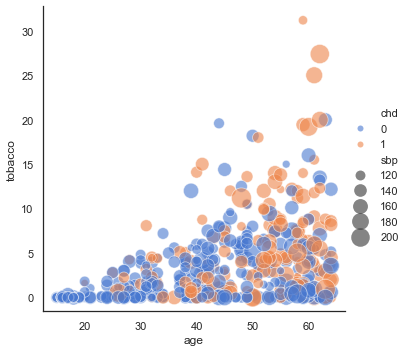

In [65]:
sns.relplot(data=data, x="age", y="tobacco", hue="chd", size="sbp",
            sizes=(40, 400), alpha=.6, palette="muted", )
plt.show()

Tobacco consumption increases overall with age, and cases of high consumption are not at all present among young people. This is consistent with the fact that smoking is a long-term habit and was more acceptable then than now.

- We can also see that very few people with high tobacco consumption at a high age have no heart disease. And the only people with a fairly high level of tobacco consumption and age who have no heart problems have the right blood pressure. Smoking therefore represents an enormous long-term risk of heart disease.
- It's easy to see why age, smoking and blood pressure are the 3 variables most linearly correlated with chd.

There are a few outliers in the graphs

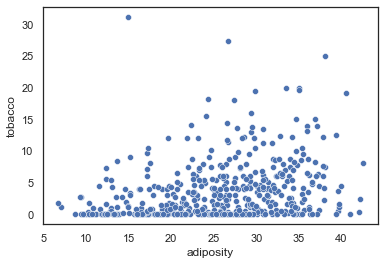

In [66]:
sns.scatterplot(data=data,x="adiposity",y="tobacco")
plt.show()

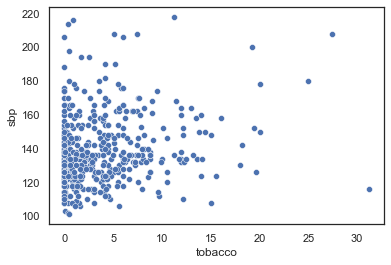

In [67]:
sns.scatterplot(data=data, x="tobacco",y="sbp")
plt.show()

In [68]:
data[(data.tobacco > 25) & (data.sbp < 130)].head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
115,116,31.2,3.17,14.99,Absent,47,19.4,49.06,59,1


In [69]:
data[(data.adiposity < 20) & (data.tobacco > 30)].head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
115,116,31.2,3.17,14.99,Absent,47,19.4,49.06,59,1


In [70]:
#These 2 outliers with different graphics belong to the same person. It's better to delete
print(data.shape[0])
data = data[~((data.adiposity < 20) & (data.tobacco > 30))]
print(data.shape[0])

460
459


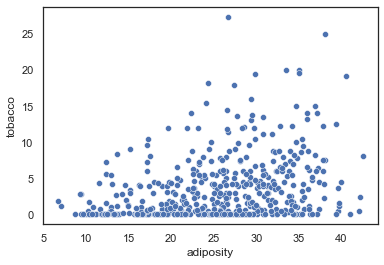

In [71]:
sns.scatterplot(data=data,x="adiposity",y="tobacco")
plt.show()

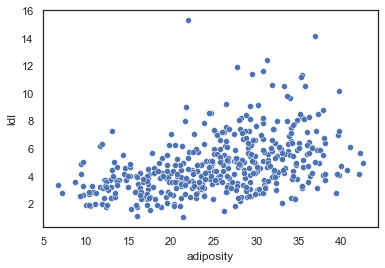

In [72]:
sns.scatterplot(data=data, x="adiposity",y="ldl")
plt.show()

In [73]:
data[(data.ldl > 15) & (data.adiposity < 25)].head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
17,120,7.5,15.33,22.0,Absent,60,25.31,34.49,49,0


A very strange point, but not impossible with a lot of sport. A must-see

Encoding categorical variables:
- famhist : data.famhist = data.famhist.replace({"Absent":0,"Present":1})